Battery recharged. Recharge count: 1
Battery recharged. Recharge count: 2
Battery recharged. Recharge count: 3
Battery recharged. Recharge count: 4
Battery recharged. Recharge count: 5
Battery recharged. Recharge count: 6
Battery recharged. Recharge count: 7
Solution Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (6, 4), (7, 4), (7, 5), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 9)]
Remaining Battery Percentage: 60
Total Recharge Count: 7


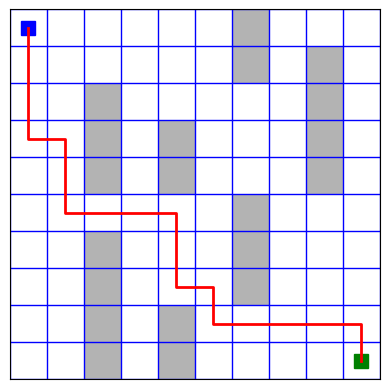

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque

# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state  # The current position of the agent in the grid.
        self.parent = parent  # The node in the search tree that generated this node.
        self.action = action  # The action taken to get to this state.
        self.path_cost = path_cost  # Cost from the start node to this node.

    # Comparison operator for priority queue.
    def __lt__(self, other):
        return self.path_cost < other.path_cost

# Environment Class represents the grid and handles state transitions.
class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = start  # Starting position of the agent.
        self.goal = goal  # Goal position the agent aims to reach.

    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal


class Agent:
    def __init__(self, env):
        self.env = env  # The environment in which the agent operates.
        self.battery_level = 100  # Initialize battery level to 100%
        self.recharge_count = 0  # Initialize recharge count to 0

    def ucs_search(self):
        priority_queue = [(0, Node(self.env.initial))]  # Priority queue for UCS.
        visited = {self.env.initial}  # Tracks visited nodes.

        while priority_queue:
            path_cost, current_node = heapq.heappop(priority_queue)

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(current_node)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                # Calculate the battery cost for this action
                action_cost = 0 if current_node.state == self.env.initial else 10    # Each movement from initial position costs 0, others cost 10
                total_cost = current_node.path_cost + action_cost
                if action_cost <= self.battery_level and new_state not in visited:
                    self.battery_level -= action_cost
                    heapq.heappush(priority_queue, (total_cost, Node(new_state, current_node, action, total_cost)))
                    visited.add(new_state)

            # Check if battery needs to be recharged
            if self.battery_level == 0:
                self.recharge_battery()

        return []

    def reconstruct_path(self, current):
        path = []
        while current.parent:
            path.append(current.state)
            current = current.parent
        path.append(self.env.initial)  # Start is not included in the came_from map.
        path.reverse()  # Reverse to get the path from start to goal.
        return path

    def recharge_battery(self):
        self.battery_level = 100  # Recharge battery to 100%
        self.recharge_count += 1  # Increment recharge count
        print("Battery recharged. Recharge count:", self.recharge_count)

    def remaining_battery_percentage(self):
        return self.battery_level  # Calculate remaining battery percentage

    def total_recharge_count(self):
        return self.recharge_count  # Get total recharge count


# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path):
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'bs', markersize=10)  # Start position in blue.
    ax.plot(goal[1], goal[0], 'gs', markersize=10)  # Goal position in green.
    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=2)  # Plot the path in red.
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

# Define the grid, start position, and goal position
grid = [
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (9, 9)

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with BFS
solution_path = agent.ucs_search()
print("Solution Path:", solution_path)

# Determine the remaining battery percentage and total recharge count
remaining_battery_percentage = agent.remaining_battery_percentage()
total_recharge_count = agent.total_recharge_count()

print("Remaining Battery Percentage:", remaining_battery_percentage)
print("Total Recharge Count:", total_recharge_count)

# Visualize the solution
visualize_grid_and_path(grid, solution_path)

Battery recharged. Recharge count: 1
Battery recharged. Recharge count: 2
Battery recharged. Recharge count: 3
Battery recharged. Recharge count: 4
Battery recharged. Recharge count: 5
Battery recharged. Recharge count: 6
Battery recharged. Recharge count: 7
Solution Path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 5), (2, 5), (3, 5), (3, 6), (4, 6), (4, 7), (5, 7), (6, 7), (6, 8), (7, 8), (7, 9)]
Remaining Battery Percentage: 70


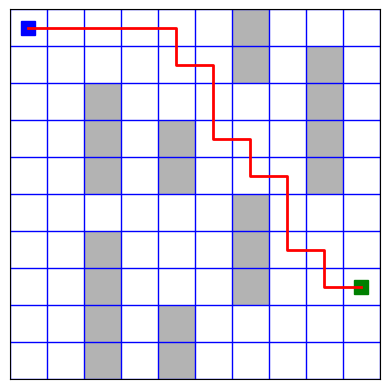

In [ ]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque

# Node Class represents a state in the search tree.
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state  # The current position of the agent in the grid.
        self.parent = parent  # The node in the search tree that generated this node.
        self.action = action  # The action taken to get to this state.
        self.path_cost = path_cost  # Cost from the start node to this node.

    # Comparison operator for priority queue.
    def __lt__(self, other):
        return self.path_cost < other.path_cost

# Environment Class represents the grid and handles state transitions.
class Environment:
    def __init__(self, grid, start, goal):
        self.grid = grid  # The grid layout where 1 represents an obstacle and 0 is free space.
        self.initial = start  # Starting position of the agent.
        self.goal = goal  # Goal position the agent aims to reach.

    # Returns the possible actions from a given state.
    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        x, y = state

        # Remove impossible actions based on grid boundaries and obstacles.
        if x == 0 or self.grid[x - 1][y] == 1:
            possible_actions.remove('UP')
        if x == len(self.grid) - 1 or self.grid[x + 1][y] == 1:
            possible_actions.remove('DOWN')
        if y == 0 or self.grid[x][y - 1] == 1:
            possible_actions.remove('LEFT')
        if y == len(self.grid[0]) - 1 or self.grid[x][y + 1] == 1:
            possible_actions.remove('RIGHT')

        return possible_actions

    # Returns the state resulting from taking a given action at a given state.
    def result(self, state, action):
        x, y = state
        if action == 'UP':
            return (x - 1, y)
        if action == 'DOWN':
            return (x + 1, y)
        if action == 'LEFT':
            return (x, y - 1)
        if action == 'RIGHT':
            return (x, y + 1)

    # Checks if the goal has been reached.
    def is_goal(self, state):
        return state == self.goal


class Agent:
    def __init__(self, env):
        self.env = env  # The environment in which the agent operates.
        self.battery_level = 100  # Initialize battery level to 100%
        self.recharge_count = 0  # Initialize recharge count to 0

    def a_star_search(self):
        priority_queue = [(0, Node(self.env.initial))]  # Priority queue for A*.
        visited = {self.env.initial}  # Tracks visited nodes.

        while priority_queue:
            path_cost, current_node = heapq.heappop(priority_queue)

            if self.env.is_goal(current_node.state):
                return self.reconstruct_path(current_node)

            for action in self.env.actions(current_node.state):
                new_state = self.env.result(current_node.state, action)
                action_cost = self.cost(current_node.state, new_state)
                heuristic_cost = self.heuristic(new_state)
                total_cost = current_node.path_cost + action_cost + heuristic_cost
                if action_cost <= self.battery_level and new_state not in visited:
                    heapq.heappush(priority_queue, (total_cost, Node(new_state, current_node, action, current_node.path_cost + action_cost)))
                    visited.add(new_state)
                    self.battery_level -= action_cost

            # Check if battery needs to be recharged
            if self.battery_level == 0:
                self.recharge_battery()

        return []

    def cost(self, state, new_state):
        return 0 if state == self.env.initial else 10  # Each movement from initial position costs 0, others cost 10

    def heuristic(self, state):
        # Implement your heuristic function here
        # For simplicity, let's use Manhattan distance
        return abs(state[0] - self.env.goal[0]) + abs(state[1] - self.env.goal[1])

    def reconstruct_path(self, current):
        path = []
        while current.parent:
            path.append(current.state)
            current = current.parent
        path.append(self.env.initial)  # Start is not included in the came_from map.
        path.reverse()  # Reverse to get the path from start to goal.
        return path

    def recharge_battery(self):
        self.battery_level = 100  # Recharge battery to 100%
        self.recharge_count += 1  # Increment recharge count
        print("Battery recharged. Recharge count:", self.recharge_count)

    def remaining_battery_percentage(self):
        return self.battery_level  # Calculate remaining battery percentage


# Visualization Function plots the grid and the found path.
def visualize_grid_and_path(grid, path):
    grid_array = np.array(grid)  # Convert grid to numpy array for easy plotting.
    fig, ax = plt.subplots()
    ax.imshow(grid_array, cmap='Greys', alpha=0.3)  # Grid background.
    start = path[0]
    goal = path[-1]
    ax.plot(start[1], start[0], 'bs', markersize=10)  # Start position in blue.
    ax.plot(goal[1], goal[0], 'gs', markersize=10)  # Goal position in green.
    xs, ys = zip(*path)  # Extract X and Y coordinates of the path.
    ax.plot(ys, xs, 'r-', linewidth=2)  # Plot the path in red.
    ax.set_xticks(np.arange(-.5, len(grid[0]), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(grid), 1), minor=True)
    ax.grid(which="minor", color="b", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)
    ax.tick_params(which="major", bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.show()

# Define the grid, start position, and goal position
grid = [
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0]
]

start = (0, 0)
goal = (7, 9)

# Create the environment and agent
environment = Environment(grid, start, goal)
agent = Agent(environment)

# Solve the problem with A*
solution_path = agent.a_star_search()
print("Solution Path:", solution_path)

# Determine the remaining battery percentage
remaining_battery_percentage = agent.remaining_battery_percentage()
print("Remaining Battery Percentage:", remaining_battery_percentage)

# Visualize the solution
visualize_grid_and_path(grid, solution_path)
